In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
suffix = "_omp"

In [3]:
# sns.set_theme(style="darkgrid")

In [4]:
df = pd.read_csv(f'out/results_strong{suffix}.csv')
df.sort_values(by=['res'], inplace=True, ascending=False)
df

,res,cpus,time,run
499,1024,16,8.984510,5
436,1024,16,39.747900,2
426,1024,16,40.219300,2
427,1024,16,42.253600,2
428,1024,16,50.346800,2
...,...,...,...,...
70,64,1,0.044647,4
71,64,1,0.044100,4
72,64,1,0.042708,4
73,64,1,0.042361,4


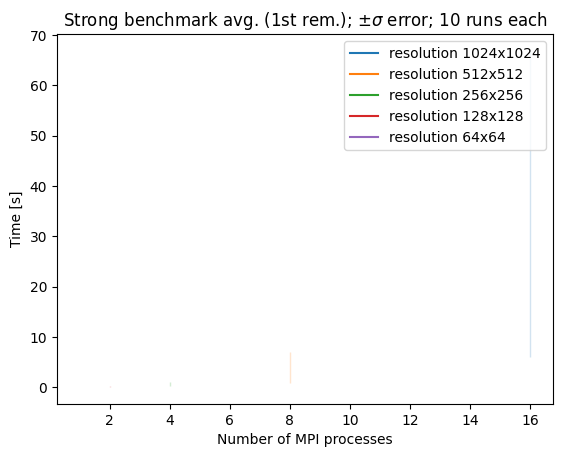

In [9]:
#plt.figure(figsize=(8, 6))

def plot_strong(data, label):

    # drop first run (warmup)
    #data = data.drop(data[data["run"] == 1].index)

    #print(data)

    sns.lineplot(x="cpus", y="time", data=data, errorbar="sd", label=label)

for res in df["res"].unique():
    plot_strong(df[df["res"] == res], f"resolution {res}x{res}")

plt.xlabel("Number of MPI processes")
plt.ylabel("Time [s]")

# add grid
plt.grid(False)
# plt.yscale('log')
# plt.xscale('log', base=2)

plt.title(f"Strong benchmark avg. (1st rem.); $\pm\sigma$ error; 10 runs each")

plt.savefig(f"../../report/plots/mini_app/strong_scaling{suffix}.svg")
plt.show()

/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_64398/3906135358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]
/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_64398/3906135358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]
/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_64398/3906135358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

ValueError: Axis limits cannot be NaN or Inf

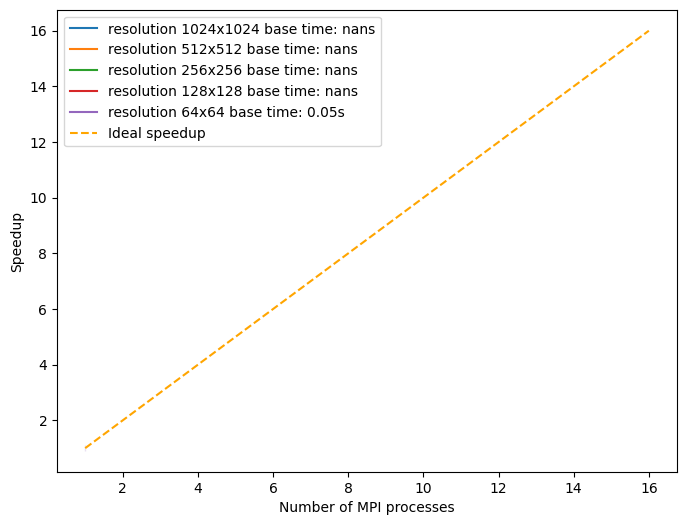

In [6]:
plt.figure(figsize=(8, 6))


def plot_speeup(data, label):
    avg_time_single = data[data["cpus"] == df["cpus"].min()]["time"].mean()
    # calculate speedup (using avg time of # process)
    data["speedup"] = avg_time_single / data["time"]

    # drop first run (warmup)
    data = data.drop(data[data["run"] == 1].index)

    sns.lineplot(
        x="cpus",
        y="speedup",
        data=data,
        #marker="o",
        label=f"{label} base time: {avg_time_single:.2f}s",
        errorbar="sd"
    )

    return data["speedup"].max()


max_value = max(
    plot_speeup(df[df["res"] == res], f"resolution {res}x{res}")
    for res in df["res"].unique()
)

max_workers = df["cpus"].max()

# add speedup line (adjust to y scale)
values = 2 ** np.arange(0, np.log2(max_workers) + 1)
plt.plot(values, values, label="Ideal speedup", linestyle='--', color='orange')


plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup")
# add legend in bottom right
plt.legend(loc='upper left')
plt.ylim(0.9, max_value * 1.1)

plt.grid(True)
plt.xscale('log', base=2)

plt.title(f"Speedup avg. (1st rem.); $\pm\sigma$ error; 10 runs each")

plt.savefig(f"../../report/plots/mini_app/speedup{suffix}.svg")

plt.show()